[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


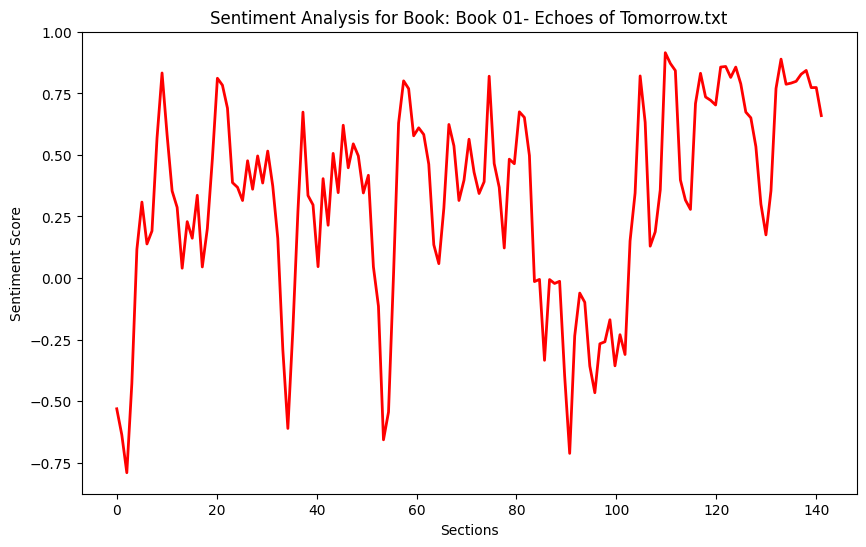

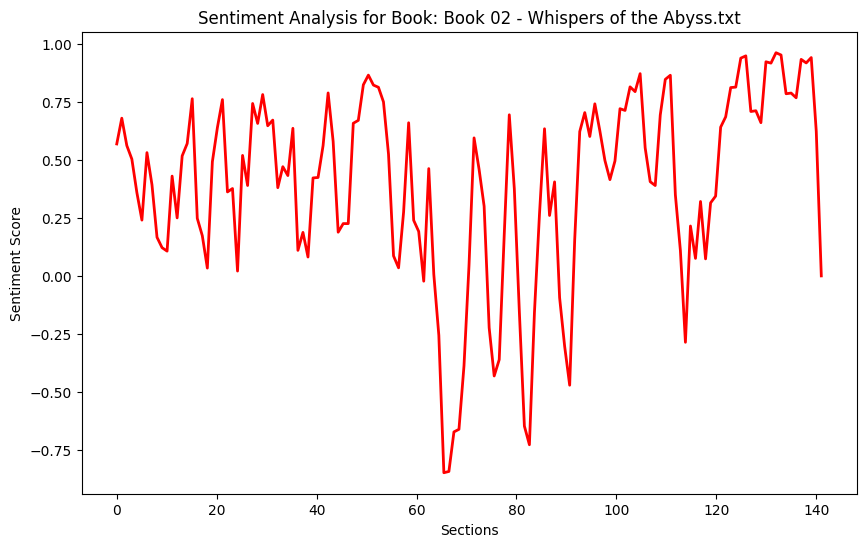

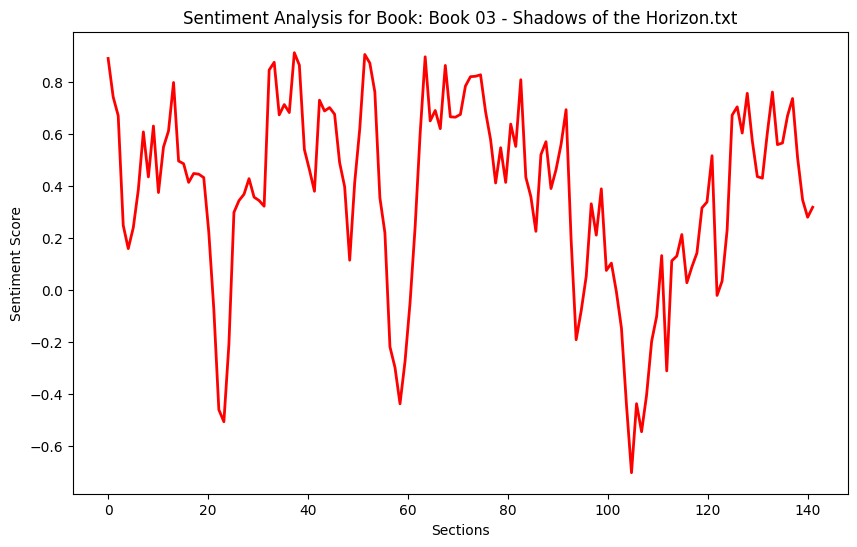

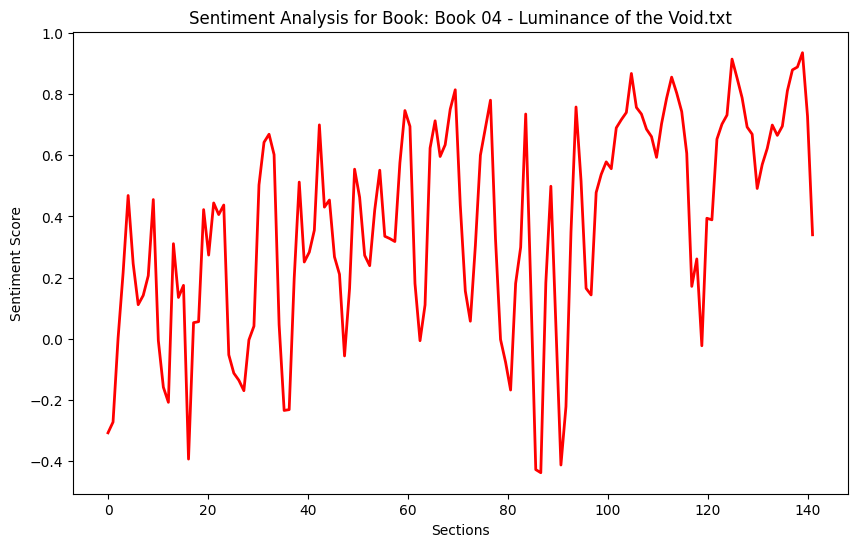

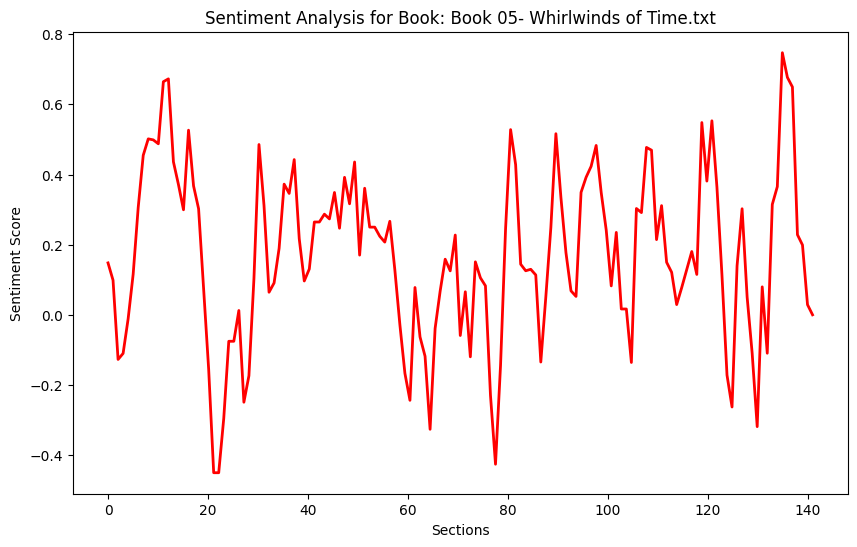

In [5]:
import os
import nltk
import numpy as np
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download NLTK data (if not already downloaded)
nltk.download('punkt')
nltk.download('vader_lexicon')

# Load and preprocess text files
def preprocess_text(text):
    # Perform any necessary preprocessing steps here (e.g., lowercasing, removing punctuation, etc.)
    return text

# Divide texts into sections
num_sections = 140

# Initialize NLTK's SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# List of book file names
book_file_names = [
    "Book 01- Echoes of Tomorrow.txt",
    "Book 02 - Whispers of the Abyss.txt",
    "Book 03 - Shadows of the Horizon.txt",
    "Book 04 - Luminance of the Void.txt",
    "Book 05- Whirlwinds of Time.txt",
    # Add more book file names as needed
]

# Path to the folder containing the book text files
books_folder = ""

# Iterate through the specified book file names
for file_name in book_file_names:
    file_path = os.path.join(books_folder, file_name)
    
    if os.path.exists(file_path):
        with open(file_path, "r", encoding="utf-8") as file:
            text = file.read()
        
        preprocessed_text = preprocess_text(text)

        sentiment_scores = [sia.polarity_scores(section)['compound'] for section in preprocessed_text.split('\n\n')]
        mean_sentiment = np.mean(sentiment_scores)

        section_size = len(preprocessed_text) // num_sections
        sections = [preprocessed_text[i:i + section_size] for i in range(0, len(preprocessed_text), section_size)]

        x = np.linspace(0, len(sections), len(sections))
        y = [np.mean([sia.polarity_scores(section)['compound'] for section in sections[max(0, int(i) - 1):int(i) + 2]]) for i in x]

        # Create a plot
        plt.figure(figsize=(10, 6))
        plt.plot(x, y, 'r-', linewidth=2)

        plt.xlabel('Sections')
        plt.ylabel('Sentiment Score')
        plt.title(f'Sentiment Analysis for Book: {file_name}')

        custom_xticks_interval = 20
        custom_xticks = np.arange(0, len(sections), custom_xticks_interval)
        plt.xticks(custom_xticks, custom_xticks)

        plt.show()
    else:
        print(f"File not found: {file_name}")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


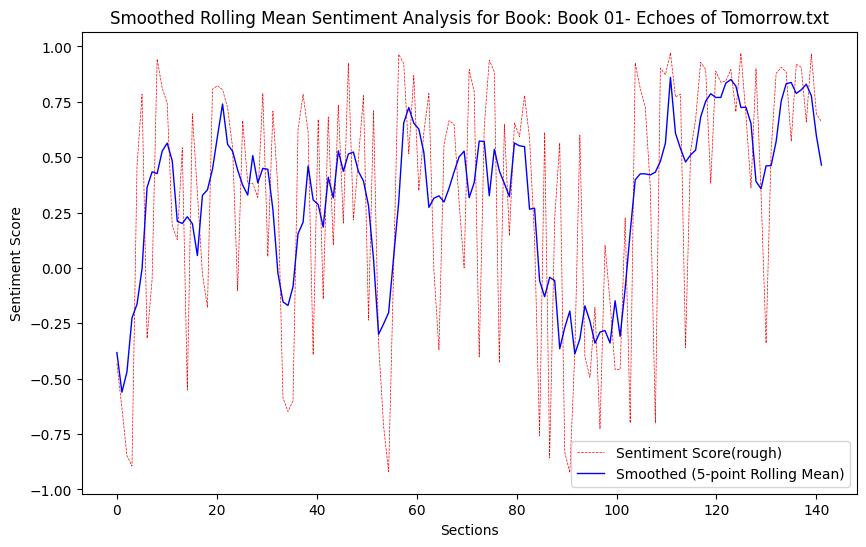

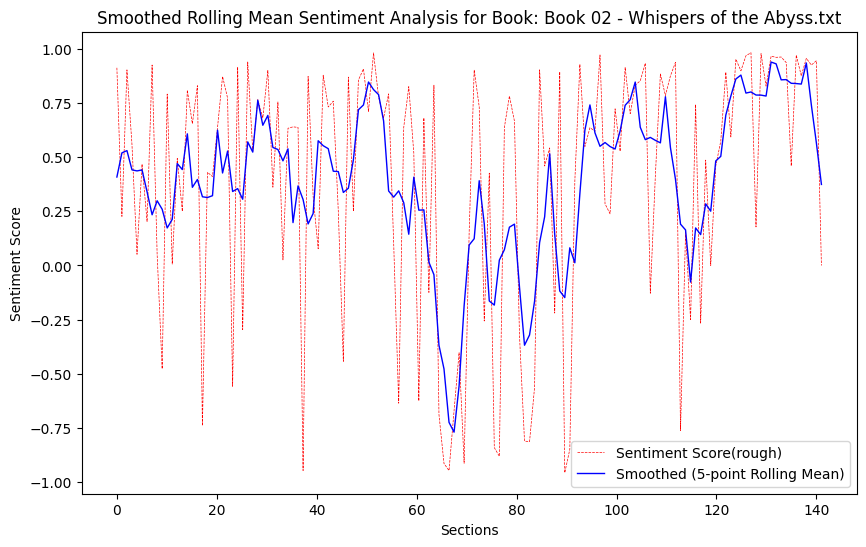

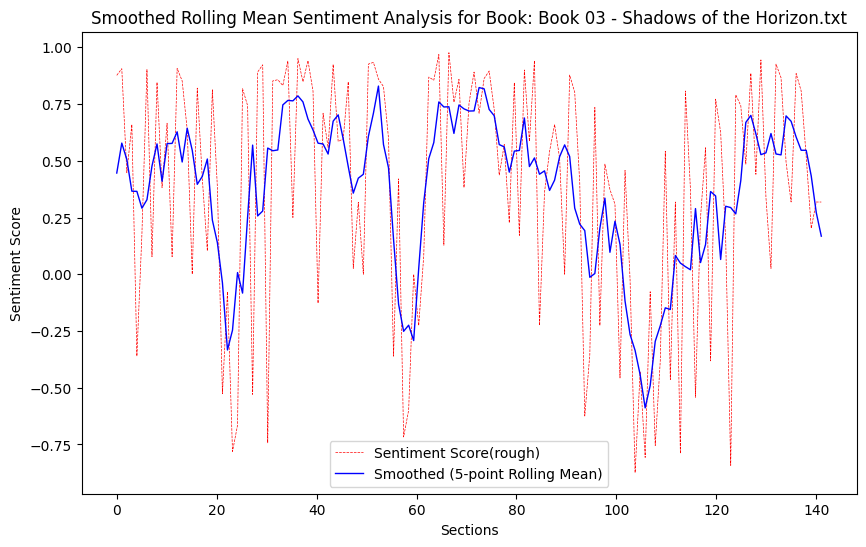

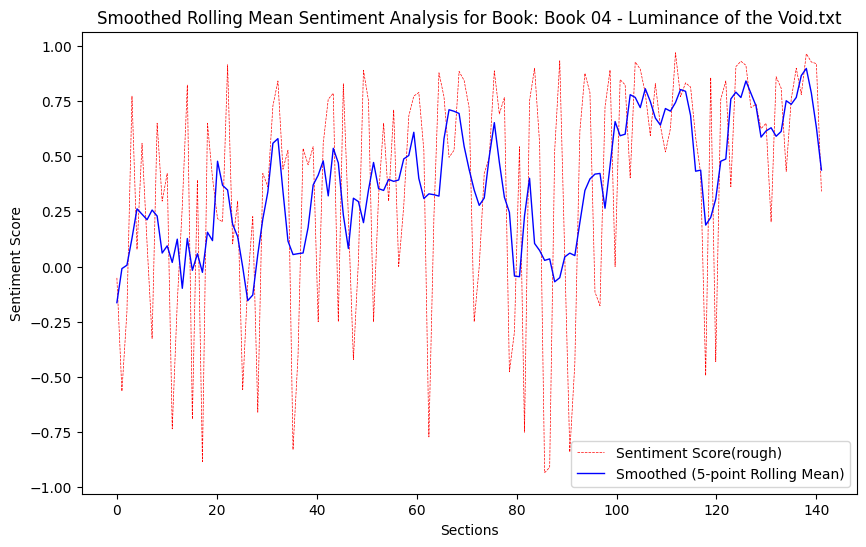

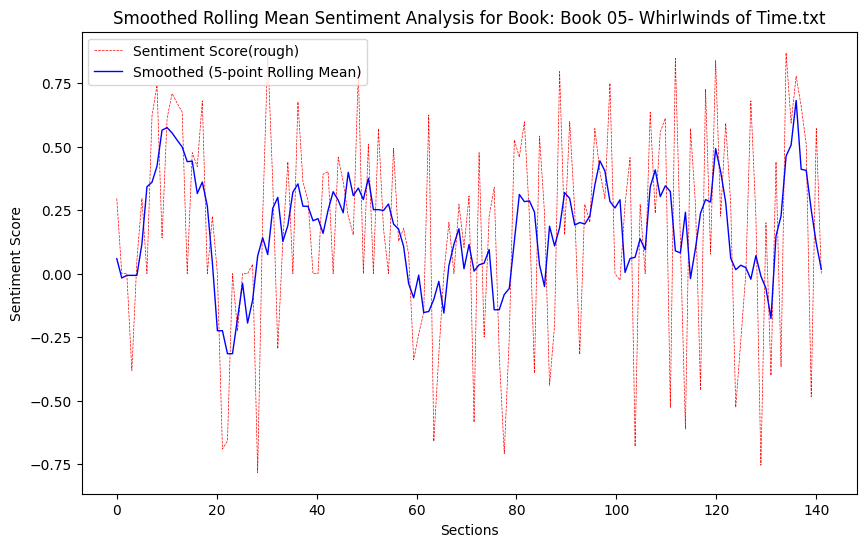

In [7]:
import nltk
import numpy as np
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize

# Download NLTK data (if not already downloaded)
nltk.download('punkt')
nltk.download('vader_lexicon')

# Load and preprocess text files
def preprocess_text(text):
    # Perform any necessary preprocessing steps here (e.g., lowercasing, removing punctuation, etc.)
    return text

# Perform sentiment analysis using NLTK's SentimentIntensityAnalyzer
def analyze_sentiment(text):
    sia = SentimentIntensityAnalyzer()
    sentiment_scores = sia.polarity_scores(text)
    sentiment_score = sentiment_scores['compound']
    return sentiment_score

# Divide texts into sections
num_sections = 140

# List of book file names
book_file_names = [
    "Book 01- Echoes of Tomorrow.txt",
    "Book 02 - Whispers of the Abyss.txt",
    "Book 03 - Shadows of the Horizon.txt",
    "Book 04 - Luminance of the Void.txt",
    "Book 05- Whirlwinds of Time.txt",
    # Add more book file names as needed
]

# Path to the folder containing the book text files
books_folder = ""

# Create sentiment analysis charts with smoothed curve lines for each book
for file_name in book_file_names:
    file_path = os.path.join(books_folder, file_name)
    
    if os.path.exists(file_path):
        with open(file_path, "r", encoding="utf-8") as file:
            text = file.read()
        
        preprocessed_text = preprocess_text(text)

        sections = sent_tokenize(preprocessed_text)  # Tokenize text into sections (sentences)
        sentiment_scores = [analyze_sentiment(section) for section in sections]

        section_size = len(preprocessed_text) // num_sections
        sections = [preprocessed_text[i:i + section_size] for i in range(0, len(preprocessed_text), section_size)]

        x = np.linspace(0, len(sections), len(sections))  # Linear section numbering
        y = [analyze_sentiment(section) for section in sections]

        # Calculate the smoothed rolling mean line
        rolling_window = 5  # Change this value to adjust the rolling window size
        rolling_mean = np.convolve(y, np.ones(rolling_window)/rolling_window, mode='same')

        plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
        plt.plot(x, y, 'r--', linewidth=0.5, label='Sentiment Score(rough)')  # Original sentiment score line
        plt.plot(x, rolling_mean, 'b-', linewidth=1, label=f'Smoothed ({rolling_window}-point Rolling Mean)')  # Smoothed rolling mean line

        plt.xlabel('Sections')
        plt.ylabel('Sentiment Score')
        plt.title(f'Smoothed Rolling Mean Sentiment Analysis for Book: {file_name}')
        plt.legend()  # Add a legend to differentiate the lines

        # Calculate the positions of custom x-axis ticks
        custom_xticks_interval = 20  # Change this value to your desired interval
        custom_xticks = np.arange(0, len(sections), custom_xticks_interval)

        # Set the x-axis ticks and labels
        plt.xticks(custom_xticks, custom_xticks)

        plt.show()
    else:
        print(f"File not found: {file_name}")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


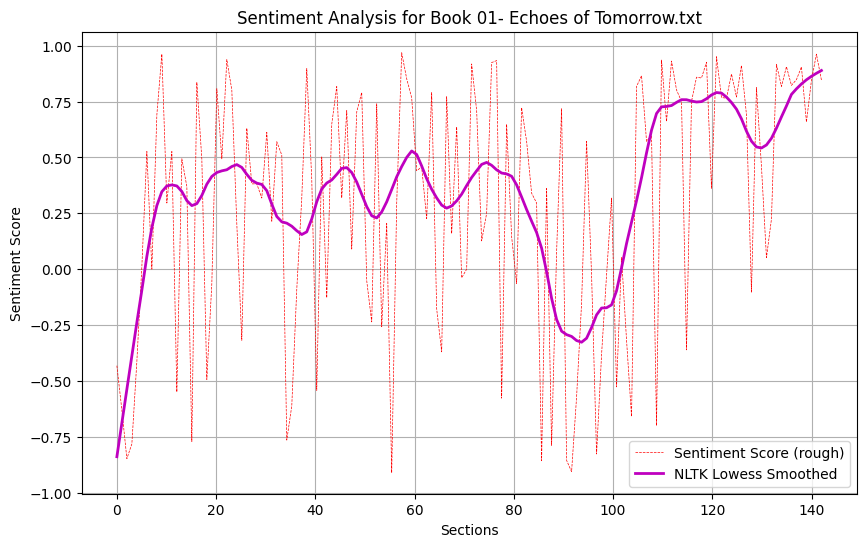

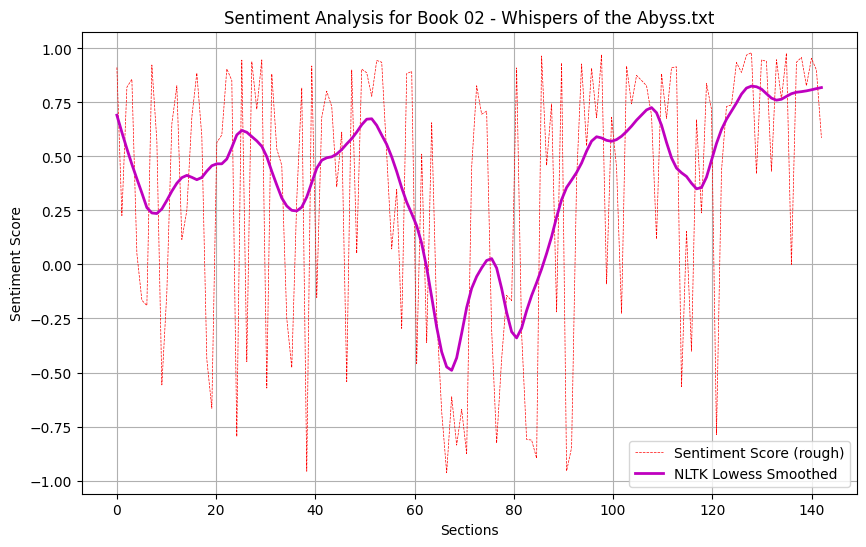

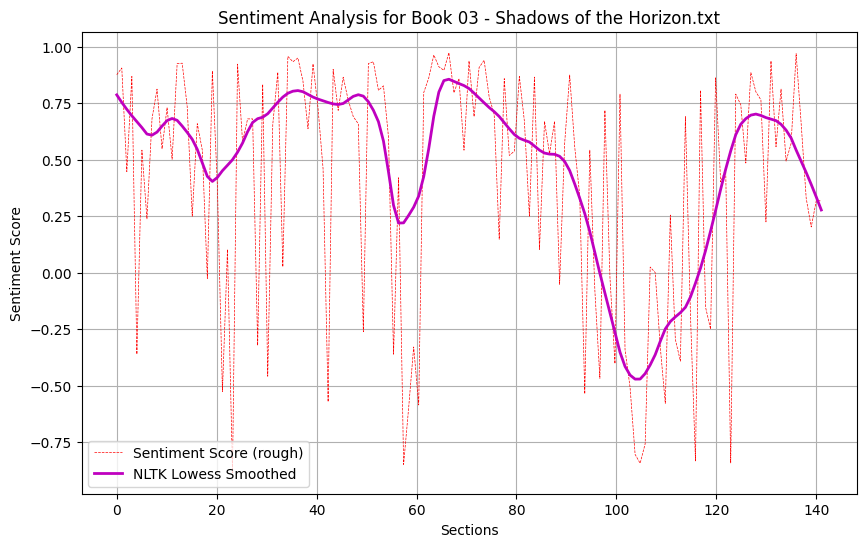

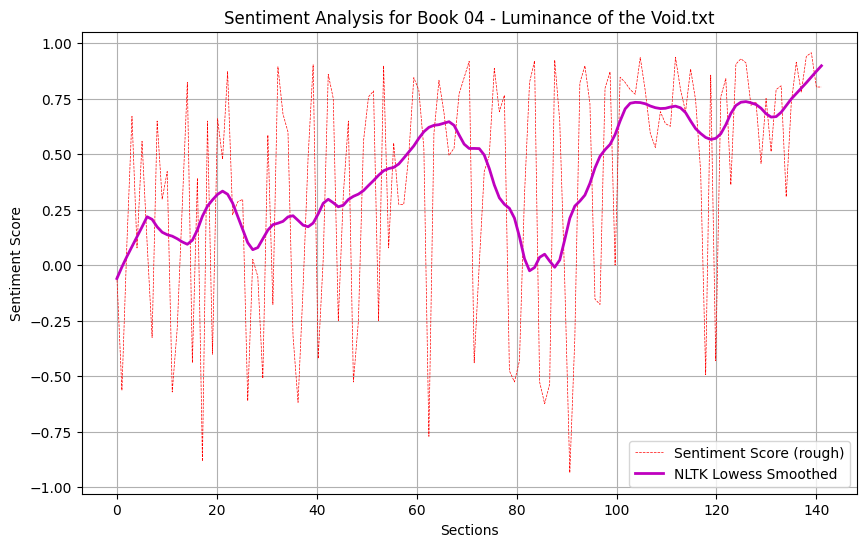

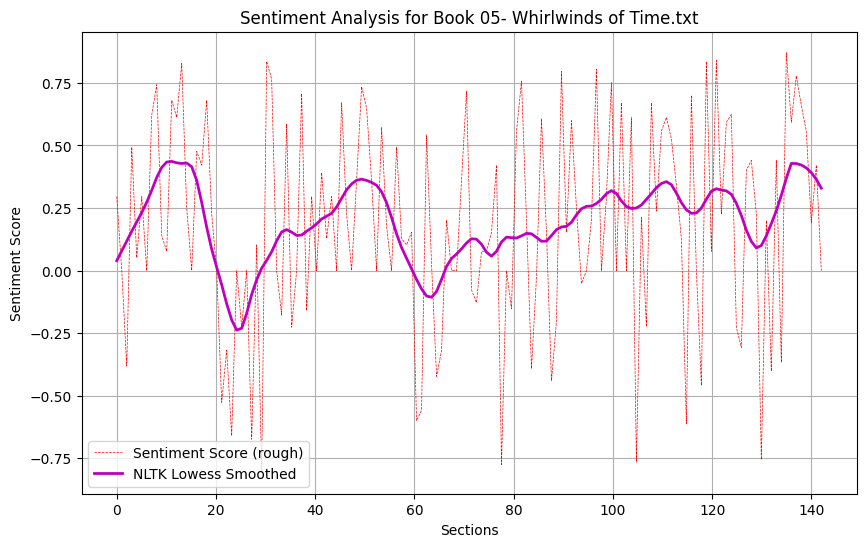

In [30]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
from statsmodels.nonparametric.smoothers_lowess import lowess
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download NLTK resources if not already downloaded
nltk.download('vader_lexicon')

# Define the book file names
book_file_names = [
    "Book 01- Echoes of Tomorrow.txt",
    "Book 02 - Whispers of the Abyss.txt",
    "Book 03 - Shadows of the Horizon.txt",
    "Book 04 - Luminance of the Void.txt",
    "Book 05- Whirlwinds of Time.txt",
    # Add more book file names as needed
]

# Define the path to the directory containing the text files
text_files_dir = ''  # Provide the correct directory path
num_sections = 140  # Number of sections to divide the text into

# Load and preprocess text files
def load_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

def preprocess_text(text):
    # Perform any necessary preprocessing steps here (e.g., lowercasing, removing punctuation, etc.)
    return text

# Perform sentiment analysis using NLTK's VADER SentimentIntensityAnalyzer
def perform_sentiment_analysis_nltk(text):
    sia = SentimentIntensityAnalyzer()
    sentiment_score = sia.polarity_scores(text)['compound']
    return sentiment_score

# ... (other functions)

# Create sentiment analysis charts with smoothed curve lines
for book_file in book_file_names:
    file_path = os.path.join(text_files_dir, book_file)
    text = load_text(file_path)
    preprocessed_text = preprocess_text(text)

    # Divide the text into sections
    words = preprocessed_text.split()
    section_size = len(words) // num_sections
    sections = [words[i:i+section_size] for i in range(0, len(words), section_size)]

    sentiment_scores_nltk = [perform_sentiment_analysis_nltk(' '.join(section)) for section in sections]

    x = np.linspace(0, len(sections), len(sections))
    y_nltk_rough = sentiment_scores_nltk

    # Calculate Lowess smoothed curves for NLTK sentiments
    lowess_nltk_smoothed = lowess(y_nltk_rough, x, frac=0.1)

    # Create the plot with smoothed curve for NLTK sentiments and sentiment scores
    plt.figure(figsize=(10, 6))

    plt.plot(x, y_nltk_rough, 'r--', linewidth=0.5, label='Sentiment Score (rough)')
    plt.plot(lowess_nltk_smoothed[:, 0], lowess_nltk_smoothed[:, 1], linestyle='-', color='m', linewidth=2, label='NLTK Lowess Smoothed')
    plt.xlabel('Sections')
    plt.ylabel('Sentiment Score')
    plt.title(f'Sentiment Analysis for {book_file}')  # Use the file name instead of the title
    plt.legend()
    plt.grid(True)

    plt.show()












